# Project Business Statistics:  E-news Express

## Problem Statement

### Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group).  Various data about the customers in both groups are collected in 'abtest.csv'.

### Objective

Suppose you are hired as a Data Scientist in E-news Express. Perform statistical analysis of business data. Explore the dataset and extract insights from the data. 

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.(EDA) 

2. Do the users spend more time on the new landing page than the old landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

### Data Description

The data contains the different data related to a E-news Express. The detailed data dictionary is given below.


### Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

## 1.a. Understand the Structure of the Data

### Let us start by importing the required libraries

In [1]:
#import the important packages

import warnings 
warnings.filterwarnings('ignore') # supress warnings
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [2]:
# reading the dataset using pandas read_csv
df=pd.read_csv("abtest.csv") 

In [3]:
df.head() # display first 5 rows of dataset using head() function

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observation: 

The DataFrame has 6 columns mentioned in the datatictionary.  Data in each row correcponds to the activity, duration spent on the page and preferences of each user. 

In [4]:
df.shape # identifies the shape of the dataset(number of rows and columns)

(100, 6)

#### Observation:

The DataFrame contains the information of 100 rows(users) with 6 columns(variables) 

In [5]:
df.user_id.value_counts() # Find the uniquness of the columns user_id

546560    1
546473    1
546483    1
546482    1
546481    1
         ..
546590    1
546589    1
546588    1
546587    1
546559    1
Name: user_id, Length: 100, dtype: int64

#### Observations:

The dataset has 100 unique customers, which has been verified using value_counts function on user_id column. 

In [6]:
df.describe() # gives the statistical values for numerical variables

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:

* The maximum time spent on the page is 10.71 minutes by overall users. 
* Minimum time spent on the page is 0.19 minutes by overall users. 
* Average time spent by a customer is 5.377 minutes by overall users. 
* Standard deviation of the time spent between the users is 2.37 minutes by overall users. 

In [7]:
df.describe(include="object") # returns the statistical values for objective variable

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


#### Observations:

* There are 4 objective type variables in the dataset.
* group column has 2 unique catagories.
* landing_page columns has 2 unique catagories. 
* converted column has 2 unique catagories.The frequency of catagory "yes" is 54 which is the highest in this column.
* language_preferred has 3 unique catagories, language Spanish and French are counted to highest number of 34 in the column.  

In [8]:
df.info() # identifies the missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:

* There are 4 objective type columns(variables), 1 integer column(variable) and 1 float column(variable) in the data set. 
* There are no columns with null value/missing value in the data set. 
* Used memory space for this data set is 4.8 KB. 

In [9]:
# coverting "objects" to "category" reduces the data space required to store the dataframe

df.group = df.group.astype('category') # Convert group from object to category
df.landing_page = df.landing_page.astype('category') # Convert landing_page from object to category
df.converted = df.converted.astype('category')  # Change the column converted from object to category
df.language_preferred = df.language_preferred.astype('category') # Convert language_preferred from object to category


# use info() to print a concise summary of the DataFrame and check wether the size of df been reduced or not. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:

* The datatype of the columns group, landing_oage, converted and language_preferred been converted to catagory from        objective type.
* The memory size of the dataframe now reduced to 2.6 KB from 4.8 KB.

In [10]:
df["converted"].value_counts() # counts the number of unique items in the "converted" column

yes    54
no     46
Name: converted, dtype: int64

#### Observation:

There are 54 yes and 46 no in the converted column.

In [11]:
df["landing_page"].value_counts() # counts the number of unique items in the "landing_page" column

new    50
old    50
Name: landing_page, dtype: int64

#### Observations:

* There are 50 old landing_page and 50 new landing_page in the landing_page column. 

In [12]:
df["language_preferred"].value_counts() # counts the number of unique items in the "language_preferred" column

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations:

* There are 3 languages in the language_preferred column. 
* French and Spanish counts to 34 each and Enlish counts to 32. 

In [13]:
df["group"].value_counts() #  counts the number of unique items in the "group" column

control      50
treatment    50
Name: group, dtype: int64

#### Observations:

* group column has 2 unique catagory which is control and treatment. Each group has 50 users in it. 

In [14]:
df_group_time=df.groupby(by=["group"])["time_spent_on_the_page"].describe()
df_group_time

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


#### Observations:

* The mean time spent by control group user is 4.5 mins and treatment group user is 6.22 mins
* The standard dev of control group users is 2.58 mins and treatment group user is 1.81 mins
* The minimum time spent by control group users is 0.19 mins and treatment group user is 1.65 mins
* The maximum time spent by control group users is 10.30 mins and treatment group user  is 10.71 mins. 

In [15]:
df.isna().sum() # finds if there is any null value in the data frame

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:

* There is no missing value in the dataset in any of the column. 

## 1.b. Exploratory Data Analysis

In [16]:
df. columns # Getting the list of columns to get an idea on how to  perform EDA

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

### i) Univariate Analysis

In [17]:
def label_countplot(data, column, perc=True, n=None): # User defined function to add label for countplot
    
    count=df[column].nunique() # counts the number of rows with unique values
    if n is None:
        plt.figure(figsize=(count+1,5)) # fix the figure size 
    else:
        plt.figure(figsize=(n+1,5)) 
    ax=sns.countplot(data=data, x=column, order=data[column].value_counts().index[:n].sort_values(), palette="nipy_spectral") # plots the countplot usng seaborn library.   
    for p in ax.patches: 
        if perc==True:
            label = "{:.2f}%".format( 100*p.get_height()/len(data[column]) ) # calculate the percentafe for each column(bar) in the countplot
        else:
            label = p.get_height() # if perc=False, just get the count of the column
    
        x=p.get_x() + p.get_width()/2 
        y=p.get_height()
        ax.annotate(label,(x,y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)
    plt.show()

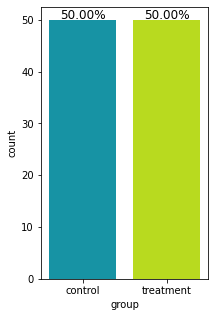

In [18]:
label_countplot(df,"group",perc=True)

#### Observation:

* The labelled countplot of "group" column shows treatment and control group have equal percentage of users which is 50%. 

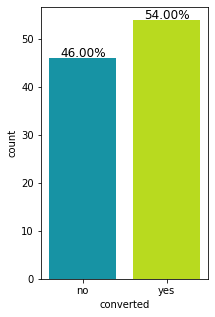

In [19]:
label_countplot(df,"converted",perc=True) # labeled countplot for converted column

#### Observation:

* The countplot shows 54% of users are converted and 46% of users are not converted. 

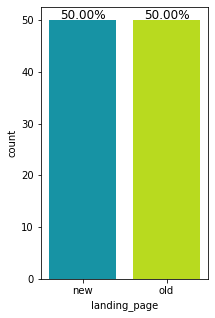

In [20]:
label_countplot(df,"landing_page",perc=True) # labelled countplot for "landing_page"

#### Observation:

* The countplot shows 50% of users are using old_landing page and 50% of users are using new_landing page. 

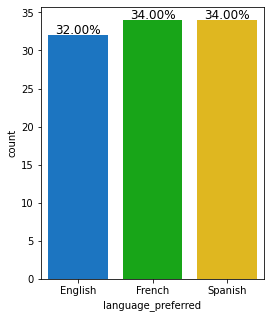

In [21]:
label_countplot(df,"language_preferred",perc=True) # labelled countplot for "language_prefered"

#### Observation:

* The countplot shows the language_preference of 32% of users is English, 34% of users is French and 34% of users is Spanish. 

<AxesSubplot:xlabel='language_preferred', ylabel='user_id'>

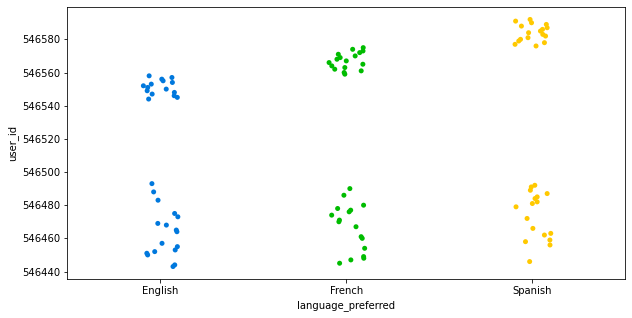

In [22]:
plt.figure(figsize=(10,5)),
sns.stripplot(data=df, y="user_id",x="language_preferred", palette="nipy_spectral")#Scatterplot for "user_id" columns,

#### Observations:

* The stripplot of user_id shows the spread of users among different language.


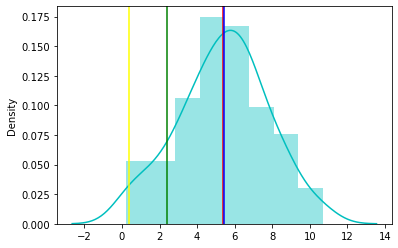

In [23]:
# find the distribution of column "time_spent_on_the_page" using distplot for overall data. 
sns.distplot(x=df["time_spent_on_the_page"],kde=True, color="c")
plt.axvline(df["time_spent_on_the_page"].mean(), color="red") # plot mean
plt.axvline(df["time_spent_on_the_page"].median(), color="blue")  # plot median
plt.axvline(df["time_spent_on_the_page"].std(), color="green") # plot std.
plt.axvline(df["time_spent_on_the_page"].mode()[0], color="yellow") # plot yellow


#### Observation:

* The distplot of time variable for overall data shows that  it follows a normal distribution. 
* Mean and Median is same, lies between 5 and 6.
* Standard deviation is around 2.5 mins
* Mode lies between 0 and 1

### Time Distribution of "Control" Group

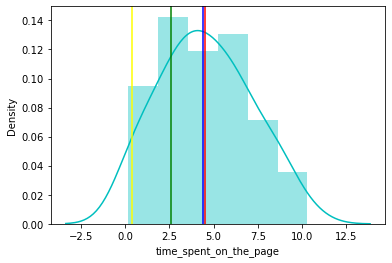

In [24]:
df_control=df.copy() # copy current dataframe to new dataframe called df_control
df_control=df_control.set_index("group") # changing the group column as index
df_control_time=df_control.drop(labels="treatment",axis=0) # drop the treatment group  rows as we need only the control group. 
df_control_time.head() # check the removal of treatment group using head()

sns.distplot(df_control_time["time_spent_on_the_page"],kde=True, color="c")
plt.axvline(df_control_time["time_spent_on_the_page"].mean(), color="red") # plot mean
plt.axvline(df_control_time["time_spent_on_the_page"].median(), color="blue")  # plot median
plt.axvline(df_control_time["time_spent_on_the_page"].std(), color="green") # plot std.
plt.axvline(df_control_time["time_spent_on_the_page"].mode()[0], color="yellow") # plot yellow


#### Observations:

* Time distribution of "control" group follows normal distribution. 
* Mean and median is nearly same which is around 4.8 mins. 

### Time Distribution of "Treatment" group. 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

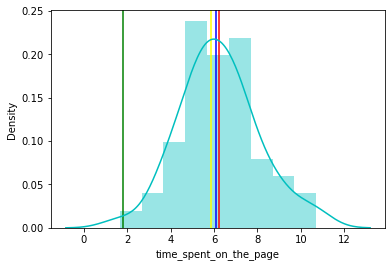

In [25]:
df_treatment=df.copy() # copy current dataframe to new dataframe called df_treatment
df_treatment=df_treatment.set_index("group") # changing the group column as index
df_treatment_time=df_treatment.drop(labels="control",axis=0) # drop the control group  rows as we need only the control group. 
df_treatment_time.head() # check the removal of control group using head()
plt.axvline(df_treatment_time["time_spent_on_the_page"].mean(), color="red") # plot mean
plt.axvline(df_treatment_time["time_spent_on_the_page"].median(), color="blue")  # plot median
plt.axvline(df_treatment_time["time_spent_on_the_page"].std(), color="green") # plot std.
plt.axvline(df_treatment_time["time_spent_on_the_page"].mode()[0], color="yellow") # plot yellow


sns.distplot(df_treatment_time["time_spent_on_the_page"],kde=True, color="c")

#### Observations:

* Time distribution of "Treatment" group follows perfect normal distribution. 
* Mean, median and mode is almost equal which is around 6 mins. 

In [26]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="c"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="nipy_spectral"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

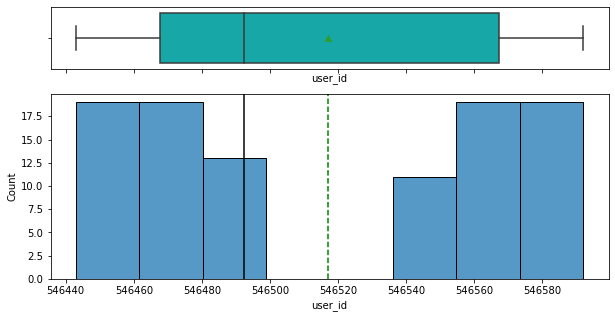

In [27]:
histogram_boxplot(df, "user_id") # hist_boxplot for "user_id"

#### Observation:

* The histogram_boxplot of user_id shows there is no skewness or outliers in the data. 

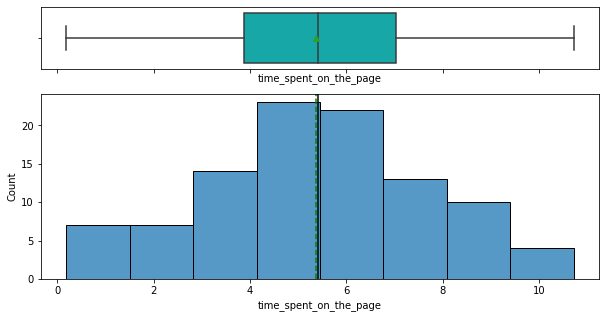

In [28]:
histogram_boxplot(df,"time_spent_on_the_page") # histoboxplot for time_spent_on_the_page

#### Observations:

* The histogram_boxplot of the variable "time_spent_on_the_page" shows there is no outliers in the data.
* mean and median are almost equal. It liest between 5 to 6 mins. 

### ii) Bivariate Analysis

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

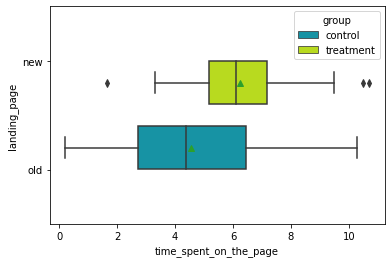

In [29]:
sns.boxplot(data = df,y='landing_page',x='time_spent_on_the_page', showmeans=True, hue=df['group'], palette="nipy_spectral") # Bivariate Analysis using boxplot for "landing_page" and "time_spent_on_the_page"

#### Observation:

* There are few outliers on the timespent on new_landing_page
* Mean time spent on new landing_page lies around 6 minutes
* Mean time spent on old landing_oage lies around 4.8 mins. 
  

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='language_preferred'>

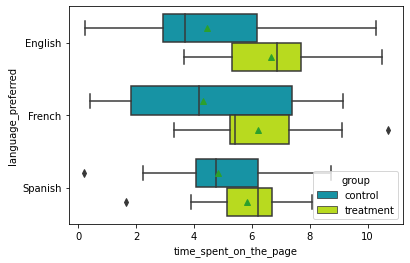

In [30]:
sns.boxplot(data = df,y='language_preferred',x='time_spent_on_the_page', showmeans=True, hue=df['group'], palette="nipy_spectral") # Bivariate Analysis for "language_preferred" and "time_spent_on_the_page" using boxplot

#### Observations:
 
* There is no outlier in the time who prefers English
* There are few outliers in the time spent on page who prefers French and Spanish. 
* Mean time spent by treatment group is more than control group for all the language users. 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='converted'>

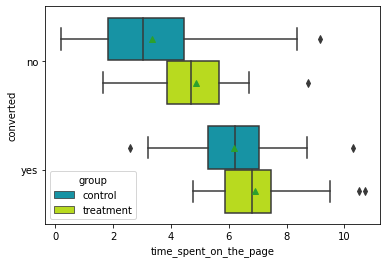

In [31]:
sns.boxplot(data = df,y='converted',x='time_spent_on_the_page', orient="h", showmeans=True, hue=df['group'], palette="nipy_spectral") # bivariate analysis using boxplot for "group" and "time_spent_on_the_page" with hue "converted"

#### Observations:

* There are few outliers on the time spent on page for the converted status with "yes" and also for converted status with    "no".
* The mean time spent by both the groups with converted status "yes" is high compare to the mean time spent by the users whose covnerted status is "no". 

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='group'>

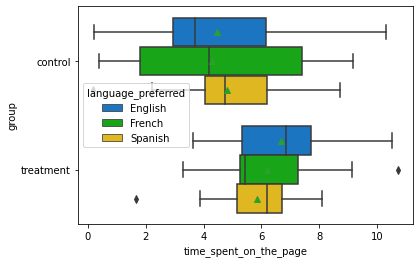

In [32]:
sns.boxplot(data=df, x="time_spent_on_the_page", y="group", hue="language_preferred",orient="h",showmeans=True, palette="nipy_spectral")

#### Observations:

* The mean time spent by treatment group for all the language users is more than the control group.
* There are few outliers in the treatment group who prefers French and Spanish languages. 
* There is an outlier in the control group who prefers Spanish. 



### iii) Multivariate Analysis

<Figure size 720x504 with 0 Axes>

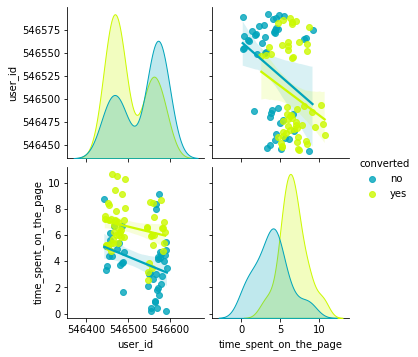

In [33]:
plt.figure(figsize=(10,7))
sns.pairplot(df, hue="converted", kind="reg", palette="nipy_spectral") # multivariate analysis using pairplots

#### Observation:

* Time spent by the different users whose converted status is "yes" is more than the converted status with "no".

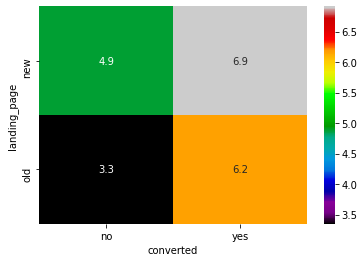

In [34]:
df_heatmap = df.pivot_table(values='time_spent_on_the_page',index='landing_page',columns='converted',aggfunc=np.mean) # creatng pivot_table to use heat map on catagorical variable
sns.heatmap(df_heatmap,annot=True, cmap="nipy_spectral") # heat_map to know the relationship between time, converted status and landing_page 
plt.show()

#### Observations:

* The mean time spent on new landing page with converted status "yes" is 6.9 mins which is higher than the mean time spent on old_landing_page with status "yes"  which is 6.2 minutes.

* The mean time spent on old landing page with converted status "no" is 4.9 mins which is higher than the mean time spent on old_landing_page with status "no"  which is 3.3 minutes. 

* Users are spending more time on the new_landing_page than the old_landing_page. 


# 2. Do the user spend more time on the new landing Page than the old landing page? 

## Step 1. Visual analysis of the required variables

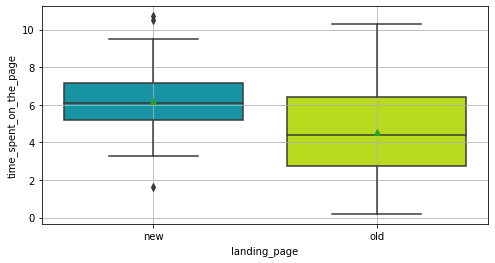

In [35]:
# Visual analysis of the distribution of 'landing_page' column
plt.figure(figsize=(8,4))
sns.boxplot(y="time_spent_on_the_page",orient="v", x="landing_page", data = df, showmeans= True, palette="nipy_spectral")
plt.grid()

#### Observations:

* There are few outliers in the data of new landing page. 
* Mean time spent by the users on new landing page is high compare to the mean time spent on old landing page. 
* 50% of users of new_landing_page spending 6 mins on the page. 
* 50% of users of old_landing page spending around 4.5 mins on the page. 


## Step 2: Calculation of required data to identify the suitable test. 

In [36]:
new_landing_page_mean=df[df["landing_page"]=="new"]["time_spent_on_the_page"].mean() # Mean time for new landing page
new_landing_page_std=df[df["landing_page"]=="new"]["time_spent_on_the_page"].std() # std for new landing page
old_landing_page_mean=df[df["landing_page"]=="old"]["time_spent_on_the_page"].mean() # Mean time for old landing page
old_landing_page_std=df[df["landing_page"]=="old"]["time_spent_on_the_page"].std() # std for old landing page

# Printing the above results using print statement.  

print("New landing page mean:", new_landing_page_mean)
print("New landing page standard deviation:", new_landing_page_std)
print("Old landing page mean:", old_landing_page_mean)
print("Old landing page standard deviation:", old_landing_page_std)

New landing page mean: 6.2232
New landing page standard deviation: 1.8170310387878263
Old landing page mean: 4.532400000000001
Old landing page standard deviation: 2.581974849306046


#### Observations:

* Mean time spent on new landing page is greater than the old landing page
* Standard deviation of both the group is different from the sample

## Step 3:  Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent on **new** and **old** landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$, Mean time spent on both the landing page is equal. 

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$, Mean time spent on new_landing_page is greater than the mean time spent on old_landing_page.

#### Observations:

* From the formation of null and alternate hypothesis and question statement, it can be viewed as **one_tailed test**. 

## Step 4: Select the appropriate Test

* Continuous data - Yes, the Time is measured on a continuous scale.
* Normally distributed populations - Yes, the sample size is >30. Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use **two sample independent T-test** for this problem.

## Step 5: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

## Step 6: Calculate the p-value

**scipy.stats.ttest_ind calculates the t-test on TWO independent samples of observations when population standard deviation is not known and sample standard deviation is not equal. This function returns the test statistic and p-value for a right-tailed t-test in case the alternative parameter is set to 'greater'.**

In [37]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df[df["landing_page"]=="new"]["time_spent_on_the_page"], df[df["landing_page"]=="old"]["time_spent_on_the_page"], equal_var = False, alternative = 'greater') # Equal variance set to False after calculating the sample Standard Deviation of the 2 group. 
print('The p-value is ', p_value)
print('The test_statistics is ', test_stat)

The p-value is  0.0001392381225166549
The test_statistics is  3.7867702694199856


#### Observation: 

* p_value is <0.05

## Step 7: Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance. we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance. we reject the null hypothesis.


## Step 8: Plotting of test_statistics value and Rejection Region. 

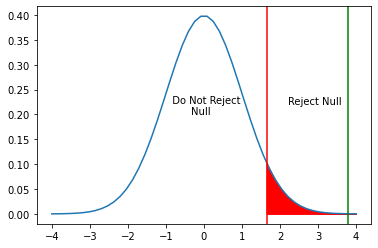

Critical_value: 1.6448536269514722


In [39]:
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 50) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val,4,50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')# fill the area under the curve before the critical value with red color
plt.axvline(x = test_stat, c = 'g') # draw vertical line for test statistics in green color. 
plt.annotate('Reject Null', (2.2, 0.22)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot
print("Critical_value:",critical_val)

#### Observation:

* The test_statistics falls in the rejection region. Hence, we reject null hypothesis. 

## Step 9: Draw Inference

As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend **more time on new_landing_page than the old_landing_page**. 

# Question 3- Is the conversion rate (the proportion of users who visit the landing page and get converted)  for the new page is greater than the old page? 

## Step 1. Visual analysis of the required variables

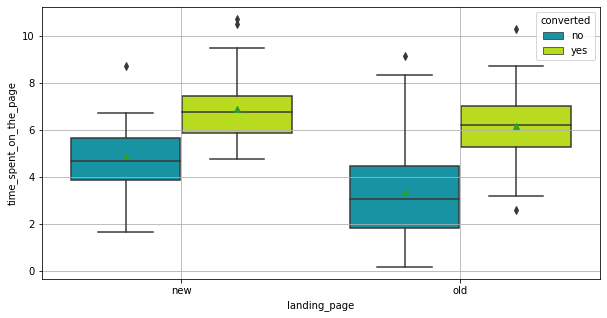

In [40]:
# Visual analysis of the distribution of 'landing_page' column with converted status hue.
plt.figure(figsize=(10,5))
sns.boxplot(y="time_spent_on_the_page", x="landing_page", hue="converted", orient="v", data = df, showmeans=True, palette="nipy_spectral")
plt.grid()

#### Observations:

* There are few outliers in the data of new and old landing page for the converted status with yes and no
* Mean time spent by the users on new landing page is high compare to the mean time spent on old landing page for both the converted status. 
* The users of new_landing_page who are spending an average of 6.8 mins on the page are ended up in subscribing the news_portal.
* The users of new_landing_page who are spending an average of 4.8 mins on the page are not subscribing the news_portal.
* The users of old_landing_page who are spending an average of 6.2 mins on the page are ended up in subscribing the news_portal.
* The users of old_landing_page who are spending an average of 3 mins on the page are not subscribing the news_portal.

## Step 2: Calculation of required data to perform the suitable test. 

In [41]:
# value count the new landing page with converted status as yes
new_converted = df[df['landing_page']=='new'].converted.value_counts()['yes']
# value count the old landing page with converted status as yes
old_converted = df[df['landing_page']=='old'].converted.value_counts()['yes']

print('The numbers of new and old converted are {0} and {1} respectively'.format(new_converted, old_converted))

# number of new landing page in the data
n_new = df.landing_page.value_counts()['new']

# number of old landing page in the data
n_old = df.landing_page.value_counts()['old']

print('The total numbers of new and old pages are {0} and {1} respectively'.format(n_new, n_old))

The numbers of new and old converted are 33 and 21 respectively
The total numbers of new and old pages are 50 and 50 respectively


#### Observations:

* The count of converted status(yes) is higher for new page than the count of converted status(yes) of old page. 


In [42]:
print(f' The proportions of convertion in new and old pages are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of convertion in new and old pages are 0.66, 0.42 respectively


#### Observations:

* The proportion of converted status to "yes" is higher for new page than the proportion of converted status(yes) of old page. 


## Step 3:  Let's write the null and alternative hypothesis

Let $p_1,p_2$ be the proportions of converted status with "Yes" for new_page and old_page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$, convertion rate of both the page is equal.

against the alternate hypothesis

>$H_a:p_1>\ p_2$, convertion rate of new page is greater than the old page.

#### Observations:

* From the question statement and from the formation of null and alternate hypothesis, we can say this is one_tailed test. 

## Step 4: Select the appropriate Test

*   Binomally distributed population - Yes, the status is either converted or not_converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =27 \geq 10 $

We can use **two sample proportion Z-test** for this problem.


## Step 5: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

## Step 6: Calculate the p_value

In [43]:
# find the p-value using proportion_ztest
from statsmodels.stats.proportion import proportions_ztest


stat, pval = proportions_ztest([new_converted, old_converted] , [n_new, n_old], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))
print('The test_stat is '+ str(stat))

The p-value is 0.008026308204056278
The test_stat is 2.4077170617153842


#### Observations:

* P_value is <0.05

## Step 7: Compare the p-value with  $\alpha$

In [44]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


## Step 8: Visual Representation

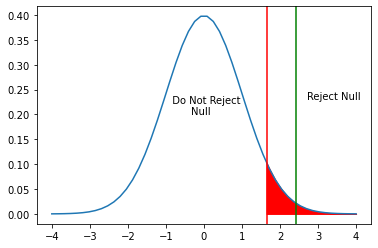

Critical_value: 1.6448536269514722


In [45]:
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(1-0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 50) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val,4,50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the rejection region with red color
plt.axvline(x = stat, c = 'g')# draw vertical green line for test statistics
plt.annotate('Reject Null', (2.7, 0.23)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot
print("Critical_value:",critical_val)

#### Observation:

* The test_statistics falls in the rejection region. Hence, we reject null hypothesis. 

## Step 9: Draw Inference

Since, the p_value is less than 0.05, we Reject Null Hypothesis. Hence, we have enough evidence to say the conversion rate for new page is greater than the old page. 

# Question 4: Converted Status depend on the preferred language?

## Step 1. Visual analysis of the required variables

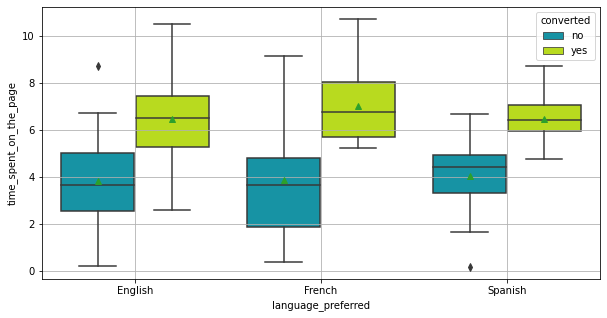

In [46]:
# Visual analysis of the distribution of 'landing_page' column
plt.figure(figsize=(10,5))
sns.boxplot(y="time_spent_on_the_page", x="language_preferred", hue="converted",orient="v", palette="nipy_spectral",data = df, showmeans=True)
plt.grid()


#### Observations:

* There are few outliers in the data of English and Spanish preferred language users. 
* Mean time spent by the users and who get converted to "yes" is higher than the users whose converted status is "no" for all the three languages. 
* The mean time of French preferred users  is little high compared to other language preferred users, where the converted status is "yes". 
* The mean time of spanish preferred users is high compare to other language preferred users, where the converted status is "no". 
* The mean and medien of all the the language users for both the converted status is almost equal except Spanish with converted status "no". 

## Step 2: Define null and alternative hypotheses

$H_0:$ Converted Status is independent of the preferred language. 

$H_a:$ Converted Status is NOT independent of language_preferred. 

## Step 3: Select Appropriate test

The formulated hypotheses can be tested using a **Chi-square test of independence** of attributes, concerning the two categorical variables, converted status (yes/no) and language preference (English/French/Spanish).

## Step 4: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

## Step 5: Calculation of required data to perform the suitable test. 

In [47]:
# import the chi2_contigency library from stats

from   scipy.stats import chi2_contingency 

# Create the contigency table
cont_tab=pd.crosstab(df["converted"],df["language_preferred"])
cont_tab

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### Observations:

* For the language English the converted numbers are high compare to other language. 

## Step 6: Calculate the p-value

In [48]:
#find the p_value using Chi2_contifency function
chi2, pval2, dof, exp_freq = chi2_contingency(cont_tab)
# print the p-value
print('The p-value is', pval2)
print("Test_Statistics:", chi2)
print("Degree of Freedom:", dof)

The p-value is 0.21298887487543447
Test_Statistics: 3.0930306905370837
Degree of Freedom: 2


#### Observations:

The P_value is greater than 0.05.

## Step 7: Compare the p-value with  $\alpha$

In [49]:
# print the conclusion based on p-value
if pval2 < 0.05:
    print(f'As the p-value {pval2} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval2} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 8: Draw Inference

Since, the p_value is greater than 0.05, we cannot reject Null Hypothesis. Hence, we have don't have enough evidence to say the conversion status is not independent of preferred language. 

# Question 5: Is the mean time spent on new page is same for different preferred languages? 

## Step 1: Data Preparation to perform the suitable test

In [50]:
df.index # check index

RangeIndex(start=0, stop=100, step=1)

#### Observations:

* The index of this data set starts with 0 and stops at 100 with the step value 1.

In [51]:
df_new=df.copy() # copy current dataframe to new dataframe called df_new
df_new.head() # check the content using head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [52]:
df_new=df.set_index("landing_page") # changing the landing page as index
df_new.head() # check the above operation using head()

,user_id,group,time_spent_on_the_page,converted,language_preferred
landing_page,,,,,
old,546592,control,3.48,no,Spanish
new,546468,treatment,7.13,yes,English
new,546462,treatment,4.40,no,Spanish
old,546567,control,3.02,no,French
new,546459,treatment,4.75,yes,Spanish


#### Observations:

* The index of the data frame changed to landing_page with 2 catagories called "old" and "new". 

In [53]:
df_new_page=df_new.drop(labels="old",axis=0) # drop the old landing page rows as we need only the new landing page
df_new_page.head() # check the removal of old landing page using head()

,user_id,group,time_spent_on_the_page,converted,language_preferred
landing_page,,,,,
new,546468,treatment,7.13,yes,English
new,546462,treatment,4.40,no,Spanish
new,546459,treatment,4.75,yes,Spanish
new,546448,treatment,5.25,yes,French
new,546461,treatment,10.71,yes,French


####  Observations:

* Now the Data_Frame contains the rows only for new landing page in the name of df_new_page.

In [54]:
df_new_page.shape

(50, 5)

#### Observations:

* Now the data frame de_new_page has 50 rows and 5 columns

## Step 2. Visual analysis of the required variables

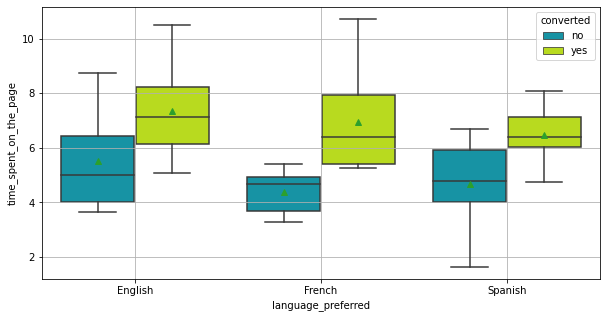

In [55]:
# Visual analysis of the 'new_landing_page'
plt.figure(figsize=(10,5))
sns.boxplot(y="time_spent_on_the_page",x="language_preferred", hue="converted",palette="nipy_spectral", data = df_new_page, showmeans=True)
plt.grid()


#### Observations:

* There is   no outliers in the data of new_landing_page with respect to preferred_language and converted status.  
* Mean time spent by the users and who get converted to "yes" is higher than the users whose converted status is "no" for all the three languages. 
* The mean time of English preferred users  is little high compared to other language preferred users where the converted status is "yes" for new_landing_page. 
* The mean time of English preferred users is quite high compare to other language preferred users, where the converted status is "no" for new_landing_page users. 
* The mean and medien time spent on the new page for Spanish language users is almost same. For other two languages, mean and medien varies except for english preferred users with converted status "yes".  

In [56]:
df_new_page.language_preferred.value_counts() # value counts for language preferred

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

## Step 3: Define null and alternate hypotheses

$H_0$ : The mean time spent on new page for each language user is equal.

$H_a$ : At least one of the mean for new_page with respect to the language category is different.

## Step 4: Select Appropriate test

This is a problem, concerning three population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions will be verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

## Step 5: Shapiro_wilk's test for testing the normality

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time_spent_on_the_page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time_spent_on_the_page do not not follow a normal distribution

### Level of Significance 

We select $\alpha$ = 0.05.

### Find the p_value

In [57]:
w, p_value = stats.shapiro(df_new_page['time_spent_on_the_page']) # perform Shapiro Test for checking the normality of the data
print('The p-value is:', p_value)

The p-value is: 0.8040016293525696


### Draw Inference

Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

## Step 6: Levene's test for Population variance: 

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

### Level of Significance 

We select $\alpha$ = 0.05.

### Find the p_value

In [58]:
statistic, p_value = stats.levene(df_new_page[df_new_page['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new_page[df_new_page['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df_new_page[df_new_page['language_preferred']=='English']['time_spent_on_the_page']) # perform levene's test for checking the equality of variance
print('The p-value is', p_value) 

The p-value is 0.46711357711340173


### Draw Inference

Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

## Step 7: Decide the significance level for ANOVA

As given in the problem statement, we select α = 0.05.

## Step 8: Calculate the p_value

In [59]:
# finding the time spent by difference language preference 

Time_French = df_new_page[df_new_page['language_preferred']=='French']['time_spent_on_the_page'] 
Time_Spanish = df_new_page[df_new_page['language_preferred']=='Spanish']['time_spent_on_the_page']
Time_English = df_new_page[df_new_page['language_preferred']=='English']['time_spent_on_the_page']

In [60]:
# Finding and printing the P-Value

test_stat_annova, pvalue = stats.f_oneway(Time_French, Time_Spanish, Time_English) # Anova for equality of variance. 
print('The p-value is ', pvalue)
print("Test_statistics:",test_stat_annova)

The p-value is  0.43204138694325955
Test_statistics: 0.8543992770006823


#### Observations:

p_value is greater than 0.05.

## Step 9: Compare the p-value with $\alpha$

In [61]:
# print the conclusion based on p-value
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 10: Draw Inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we dont have enough statistical evidence to say that the mean time spent on the new page with respect to the three different languages are different.

# Conclusion

1. Users spending more time on the new_landing_page than the old_landing_page.
2. Time spent by the different users with converted status "yes" is more than the users with converted status "no".
3. Conversion rate for new page is greater than the old page. 
4. Conversion status is independent of preferred language. 
5. The mean time spent on the new page with respect to the three different languages are equal.
6. Though the count of English language users are comparitively low, their conversion rate is higher than the other two language users. 
